In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [2]:
gta=pd.read_csv('bcancer.csv',header=0)

In [25]:
gta.head()

,id,result,rm,tm,pm,am,sm,compm,concavm,cpm,...,tw,pw,aw,sw,compw,concavw,cpw,sw,fdw,un
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [26]:
feat_cols=['id','result','rm','tm','pm','am','sm','compm','concavm','cpm','sm','fdm','rs','ts','ps','as','smooths','comps','concavs','cps','syms','fds','rw','tw','pw','aw','sw','compw','concavw','cpw','sw','fdw','un']
gta.columns=feat_cols

In [51]:
main_feat=['rm','tm','pm','am','sm','compm','concavm','cpm','sm','fdm','rs','ts','ps','as','smooths','comps','concavs','cps','syms','fds','rw','tw','pw','aw','sw','compw','concavw','cpw','sw','fdw']
x=gta.drop(['id','result','un'],1) #gta[main_feat]
y=gta.result

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [53]:
clf=DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [54]:
print('accuracy is:',metrics.accuracy_score(y_test,y_pred))

accuracy is: 0.935672514619883


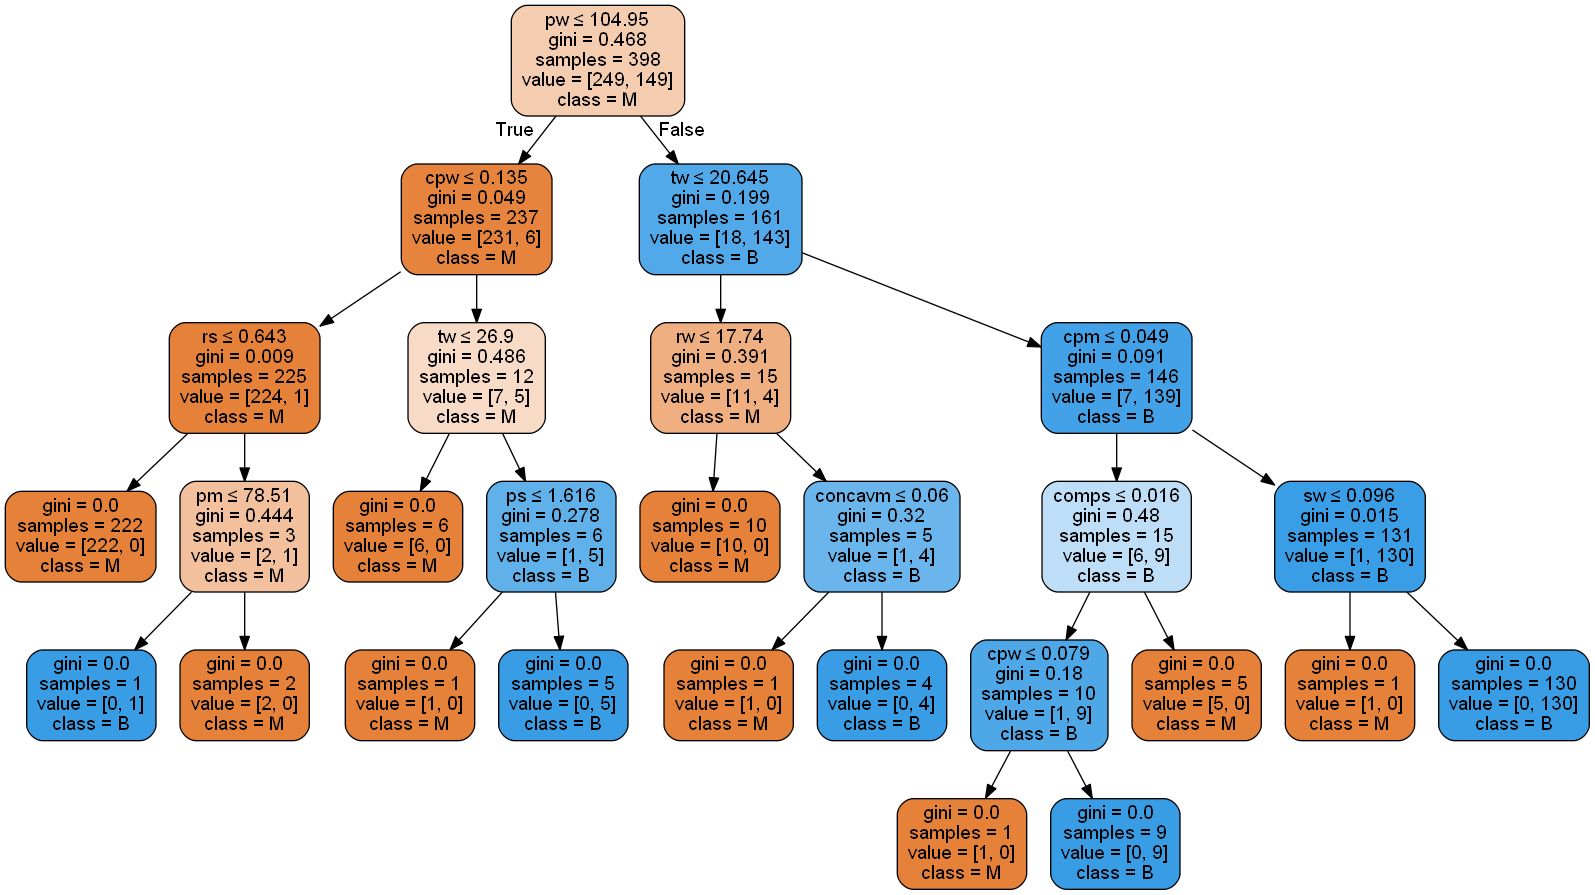

In [55]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,
                special_characters=True,feature_names = main_feat,class_names=['M','B'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bcancer_1.png')
Image(graph.create_png())